<a href="https://colab.research.google.com/github/Grivine-19/BridgeConnect/blob/master/Coronavirus_EDA_Kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Steps**</center>



*   Tokenization
*   Cleaning the data
*   Removing Stop words
*   Classification task;

  * *Positive, negative,neutral*
*   Apply supervised algorithm for classification;

  * *Bag of Words*
  * *Lexicons-pre classified set of words*

*   Calculation - *final sentiment score*







# <center>**Exploratory Data Analysis**</center>

*Here, we clean and visualize data from Data_Extraction.ipynb file to gain insights on the kind of data we are dealing with.*

In [5]:
#Import Visualization Libraries

from google.colab import drive
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Import data cleaning Libraries

from html.parser import HTMLParser

import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [6]:
#Mount the google drive folder

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# <center>**Nairobi EDA**</center>

In [7]:
#Load the dataframe

nairobi_tweets = pd.read_csv('/content/gdrive/My Drive/Tweets/nairobi.csv')

nairobi_tweets.head()

,Unnamed: 0,ID,DATE,TWEET,LOCATION,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,NaN,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",NaN,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,NaN,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,NaN,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,NaN,0,0,#COVID19KE


In [ ]:
#List the column names

for col in nairobi_tweets:
  print (col)

Unnamed: 0
ID
DATE
TWEET
LOCATION
RETWEETS
FAVORITES
HASHTAGS


In [8]:
#Drop the 'location' and 'Unnamed 0:' columns from the df

nairobi_tweets.drop(["Unnamed: 0", "LOCATION"], axis = 1, inplace = True) 

In [9]:
# Save the updated dataframe to a new csv file

nairobi_tweets.to_csv('/content/gdrive/My Drive/Tweets/nairobi_final.csv')

In [10]:
#Load the updated csv file

new_df = pd.read_csv('/content/gdrive/My Drive/Tweets/nairobi_final.csv')

#get the shape of the dataframe
print(new_df.shape)

new_df.head()  #the Unnamed: 0 column does not delete, it resulted from the merged datasets of tweets fetched from Nairobi.

(8641, 7)


,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE


In [11]:
#Check for the max and min dates in the data frame
#not correct as such in some instances

print(f" Data Available since {new_df.DATE.min()}")
print(f" Data Available upto {new_df.DATE.max()}")

 Data Available since 2019-11-09 11:23:40+00:00
 Data Available upto 2020-08-14 13:13:25+00:00


In [12]:
#Checking for null values

new_df.isnull().mean()*100 

print(new_df.isnull().sum())

'''There are null values in the hashtags column...
Droping these 1159 NAN values in the hashtag column would result in the loss of similar rows of data.
Missing values causes problems with predictor models such as SVM, we retain the NAN's because our
problem requires a classification model.'''

#Do not run lines 13 & 14 of the cell!!
'''new_df.dropna(inplace=True)
print(new_df.shape)'''

Unnamed: 0       0
ID               0
DATE             0
TWEET            0
RETWEETS         0
FAVORITES        0
HASHTAGS      1159
dtype: int64


'new_df.dropna(inplace=True)\nprint(new_df.shape)'

In [13]:
#Removing contractions from the tweet column

new_df['UNCONTRACTED'] = new_df['TWEET'].apply(lambda x: [contractions.fix(word) for word in x.split()])
new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,..."


In [14]:
#Converting the Uncontracted twwets to a string

new_df['UNCONTRACTED_STR'] = [' '.join(map(str, l)) for l in new_df['UNCONTRACTED']]
new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...


In [ ]:
#English Language Identification

pretrained_model = "lid.176.bin" 
model = fasttext.load_model(pretrained_model)langs=[]
for sent in new_df['UNCONTRACTED_STR']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
new_df['langs'] = langs

In [19]:
#Applying Tokenizer Function

new_df['TOKENIZED'] = new_df['UNCONTRACTED_STR'].apply(word_tokenize)

new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR,TOKENIZED
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...,"[#, FACupFinal, #, ruiru, #, lockdownextension..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a...","[Check, out, Audio, Book, Elven, Magic, on, Au..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru,"[#, COVID19KE, #, TheScoreKE, #, ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...,"[In, the, opening, remarks, @, Ezra_K_Yego, me..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...,"[Wishing, him, and, all, front, line, workers,..."


In [20]:
#Converting all characters to lowercase

new_df['LOWER'] = new_df['TOKENIZED'].apply(lambda x: [word.lower() for word in x])

new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR,TOKENIZED,LOWER
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...,"[#, FACupFinal, #, ruiru, #, lockdownextension...","[#, facupfinal, #, ruiru, #, lockdownextension..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a...","[Check, out, Audio, Book, Elven, Magic, on, Au...","[check, out, audio, book, elven, magic, on, au..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru,"[#, COVID19KE, #, TheScoreKE, #, ruiru]","[#, covid19ke, #, thescoreke, #, ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...,"[In, the, opening, remarks, @, Ezra_K_Yego, me...","[in, the, opening, remarks, @, ezra_k_yego, me..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...,"[Wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,..."


In [21]:
#Removing punctuations

punc = string.punctuation
new_df['NO_PUNC'] = new_df['LOWER'].apply(lambda x: [word for word in x if word not in punc])
new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR,TOKENIZED,LOWER,NO_PUNC
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...,"[#, FACupFinal, #, ruiru, #, lockdownextension...","[#, facupfinal, #, ruiru, #, lockdownextension...","[facupfinal, ruiru, lockdownextension, covid19..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a...","[Check, out, Audio, Book, Elven, Magic, on, Au...","[check, out, audio, book, elven, magic, on, au...","[check, out, audio, book, elven, magic, on, au..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru,"[#, COVID19KE, #, TheScoreKE, #, ruiru]","[#, covid19ke, #, thescoreke, #, ruiru]","[covid19ke, thescoreke, ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...,"[In, the, opening, remarks, @, Ezra_K_Yego, me...","[in, the, opening, remarks, @, ezra_k_yego, me...","[in, the, opening, remarks, ezra_k_yego, menti..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...,"[Wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,..."


In [25]:
#Removing stopwords

stop_words = set(stopwords.words('english'))
new_df['STOPWORDS_REMOVED'] = new_df['NO_PUNC'].apply(lambda x: [word for word in x if word not in stop_words])
new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR,TOKENIZED,LOWER,NO_PUNC,STOPWORDS_REMOVED
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...,"[#, FACupFinal, #, ruiru, #, lockdownextension...","[#, facupfinal, #, ruiru, #, lockdownextension...","[facupfinal, ruiru, lockdownextension, covid19...","[facupfinal, ruiru, lockdownextension, covid19..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a...","[Check, out, Audio, Book, Elven, Magic, on, Au...","[check, out, audio, book, elven, magic, on, au...","[check, out, audio, book, elven, magic, on, au...","[check, audio, book, elven, magic, audible, am..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru,"[#, COVID19KE, #, TheScoreKE, #, ruiru]","[#, covid19ke, #, thescoreke, #, ruiru]","[covid19ke, thescoreke, ruiru]","[covid19ke, thescoreke, ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...,"[In, the, opening, remarks, @, Ezra_K_Yego, me...","[in, the, opening, remarks, @, ezra_k_yego, me...","[in, the, opening, remarks, ezra_k_yego, menti...","[opening, remarks, ezra_k_yego, mentioned, ext..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...,"[Wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,...","[wishing, front, line, workers, quick, recover..."


In [31]:
#Stemming VS Lematization

'''Stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root 
of the word. let’s apply lemmatization to our data but it requires some additional steps compared to stemming.'''

#Apply parts of speech tags

new_df['POS_TAGS'] = new_df['STOPWORDS_REMOVED'].apply(nltk.tag.pos_tag)

#Convert POS tags to Wordnet format
'''write a function which make the proper conversion and then use the function within 
a list comprehension to apply the conversion.'''

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

new_df['WORDNET_POS'] = new_df['POS_TAGS'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
#new_df.head()

#Apply NLTK's word Lemmatizer

wnl = WordNetLemmatizer()
new_df['LEMMATIZED'] = new_df['WORDNET_POS'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,UNCONTRACTED,UNCONTRACTED_STR,TOKENIZED,LOWER,NO_PUNC,STOPWORDS_REMOVED,POS_TAGS,WORDNET_POS,LEMMATIZED
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,"[#FACupFinal, #ruiru, #lockdownextension, #COV...",#FACupFinal #ruiru #lockdownextension #COVID19...,"[#, FACupFinal, #, ruiru, #, lockdownextension...","[#, facupfinal, #, ruiru, #, lockdownextension...","[facupfinal, ruiru, lockdownextension, covid19...","[facupfinal, ruiru, lockdownextension, covid19...","[(facupfinal, JJ), (ruiru, NN), (lockdownexten...","[(facupfinal, a), (ruiru, n), (lockdownextensi...","[facupfinal, ruiru, lockdownextension, covid19..."
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"[Check, out, Audio, Book, Elven, Magic, on, Au...","Check out Audio Book Elven Magic on Audible, a...","[Check, out, Audio, Book, Elven, Magic, on, Au...","[check, out, audio, book, elven, magic, on, au...","[check, out, audio, book, elven, magic, on, au...","[check, audio, book, elven, magic, audible, am...","[(check, NN), (audio, JJ), (book, NN), (elven,...","[(check, n), (audio, a), (book, n), (elven, r)...","[check, audio, book, elven, magic, audible, am..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,"[#COVID19KE, #TheScoreKE, #ruiru]",#COVID19KE #TheScoreKE #ruiru,"[#, COVID19KE, #, TheScoreKE, #, ruiru]","[#, covid19ke, #, thescoreke, #, ruiru]","[covid19ke, thescoreke, ruiru]","[covid19ke, thescoreke, ruiru]","[(covid19ke, NN), (thescoreke, NN), (ruiru, NN)]","[(covid19ke, n), (thescoreke, n), (ruiru, n)]","[covid19ke, thescoreke, ruiru]"
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,"[In, the, opening, remarks, @Ezra_K_Yego, ment...",In the opening remarks @Ezra_K_Yego mentioned ...,"[In, the, opening, remarks, @, Ezra_K_Yego, me...","[in, the, opening, remarks, @, ezra_k_yego, me...","[in, the, opening, remarks, ezra_k_yego, menti...","[opening, remarks, ezra_k_yego, mentioned, ext...","[(opening, VBG), (remarks, NNS), (ezra_k_yego,...","[(opening, v), (remarks, n), (ezra_k_yego, r),...","[open, remark, ezra_k_yego, mention, extremely..."
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,"[Wishing, him, and, all, front, line, workers,...",Wishing him and all front line workers quick r...,"[Wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,...","[wishing, him, and, all, front, line, workers,...","[wishing, front, line, workers, quick, recover...","[(wishing, VBG), (front, JJ), (line, NN), (wor...","[(wishing, v), (front, a), (line, n), (workers...","[wish, front, line, worker, quick, recovery, c..."


In [33]:
#Save to a CSV file for further exploratory data analysis

new_df.to_csv('/content/gdrive/My Drive/Tweets/nairobi_clean.csv')

### **Tokenization**

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
# Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

spacy_tokenizer(sentence=new_df)

'''#Load model to return language object

nlp = spacy.load('en')

#Calling nlp on our tweet texts to return a processed Doc for each

new_df['doc'] = [nlp(TWEET) for TWEET in new_df.TWEET]

new_df.sample(3)
#new_df.head()'''

TypeError: ignored

In [ ]:
#converting HTML entities

print("""First Step : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

html_parser = HTMLParser()

First Step : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [ ]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version

new_df['CLEAN_TWEET'] = new_df['TWEET'].apply(lambda x: html_parser.unescape(x))

new_df.head()

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS,CLEAN_TWEET
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN,"Check out Audio Book Elven Magic on Audible, a..."
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE,In the opening remarks @Ezra_K_Yego mentioned ...
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE,Wishing him and all front line workers quick r...


In [ ]:
#Re-arrange the columns so that the 'clean tweets' column is preceeded by the 'tweet' column

'''List of former columns in order:
Unnamed: 0 
ID             
DATE           
TWEET          
RETWEETS       
FAVORITES      
HASHTAGS'''

new_df = new_df[['Unnamed: 0','ID','DATE','TWEET', 'CLEAN_TWEET', 'RETWEETS', 'FAVORITES', 'HASHTAGS']]


#Print out the new order of columns

'''for col in new_df:
  print(col)'''

#view the adjusted dataframe

new_df.head()

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,Wishing him and all front line workers quick r...,0,0,#COVID19KE


In [ ]:
#Removing '@User' from all the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# remove twitter handles (@user)
new_df['CLEAN_TWEET'] = np.vectorize(remove_pattern)(new_df['CLEAN_TWEET'], "@[\w]*")

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,In the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,Wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,Watch: speak out on #COVID19KE effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https://www.facebook.com/102828098178287/posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,Men with cars “Do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,KISUMU health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,Can the impact of #COVID19KE support longer te...,8,15,#COVID19KE


In [ ]:
# Changing all the tweets into lowercase

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: x.lower())
new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#facupfinal #ruiru #lockdownextension #covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","check out audio book elven magic on audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#covid19ke #thescoreke #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch: speak out on #covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https://www.facebook.com/102828098178287/posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars “do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of #covid19ke support longer te...,8,15,#COVID19KE


In [ ]:
#Replacing punctuation with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid19ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com 102828098178287 posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid19ke support longer te...,8,15,#COVID19KE


In [ ]:
#Replacing special characters with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid19ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com 102828098178287 posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid19ke support longer te...,8,15,#COVID19KE


In [ ]:
#Replacing Numbers(Integers) with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid ...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid ke support longer te...,8,15,#COVID19KE


In [ ]:
#Removing words whose length is less than 1

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
new_df['CLEAN_TWEET'][0:5]

0    facupfinal ruiru lockdownextension covid ke th...
1    check out audio book elven magic on audible am...
2                            covid ke thescoreke ruiru
3    in the opening remarks mentioned that it is ex...
4    wishing him and all front line workers quick r...
Name: CLEAN_TWEET, dtype: object

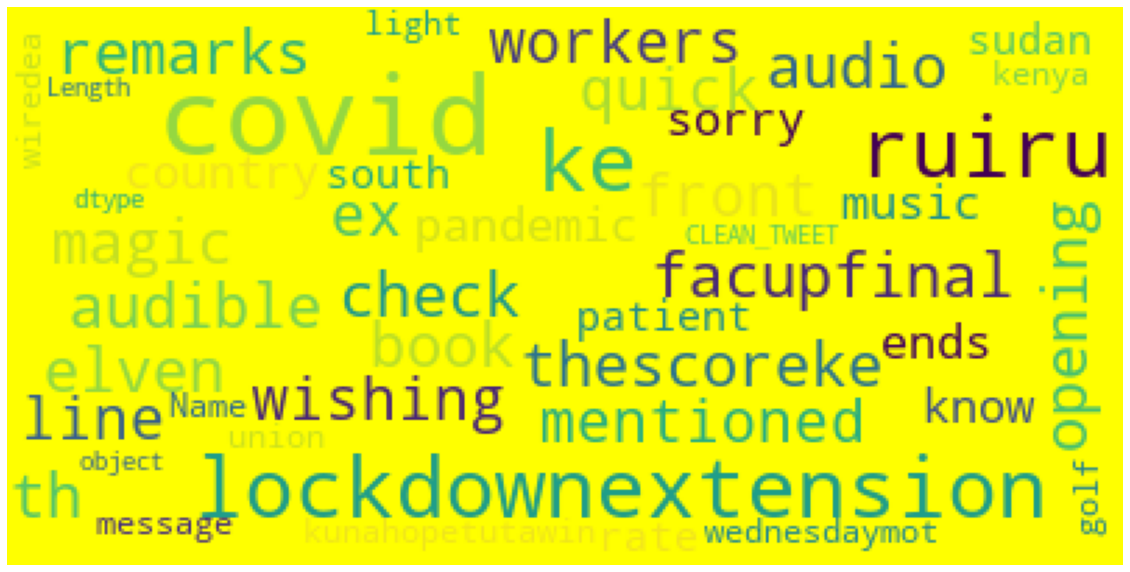

In [ ]:
#Word Cloud

wordcloud__ = WordCloud(
                          background_color='yellow',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(new_df['CLEAN_TWEET'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

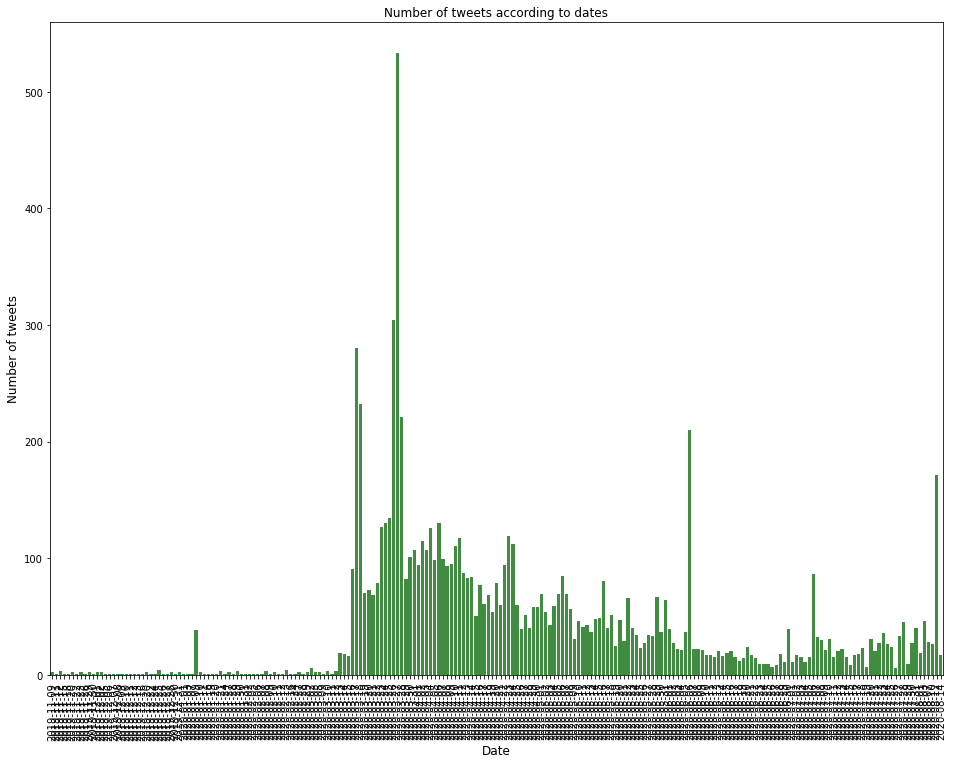

In [ ]:
#The number of tweets according to dates

new_df['DATE'] =  pd.to_datetime(new_df['DATE'])
cnt_srs =new_df['DATE'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(16,12))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()